#  Problem Statement
#### Use the Exploratory Data Anlysis(EDA) to identify the patterns or variables indicating that a customer is likely to default and minimise the risky loan applicant.

## Business Requirments
#### >>Online Loan Marketplace: The company operates as the largest online loan market place, facilitating personal loans, business loans, and medical procedure financing.

#### >>Credit Loss Mitigation: The primary challenge is to reduce credit loss, which occurs when borrowers default on loans.

#### >>Risk Identification through EDA: The focus is to identify risky loan applicant and minimising the defaults.

#### >>Driver Variable identification: The seeks to know the key features that indicate strong chances of default risk.

# Data Understanding
#### The given dataset  has 111 columns or features of a loan applicant , but only few features are important in deciding if a given loan applicant is likely to fall in default.



In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv("C:/Users/prath/Desktop/Upgrad/Data_cleaning-1/loan/loan.csv")
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [105]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,...,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,...,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,...,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
50%,6.656650e+05,8.508120e+05,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,13.400000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
75%,8.377550e+05,1.047339e+06,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,18.600000,0.000000,1.000000,...,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,...,NaN,NaN,NaN,NaN,2.000000,0.0,NaN,NaN,NaN,NaN


# 1]Fixing Columns and Rows
#### a)Delete unnecessary columns having null values more then 20% .



In [106]:
#delete unnecessary  columns having null values more then 20%
null_percentages = df.isnull().mean() * 100

# Filter columns with null values less than 20%
columns_with_few_nulls = null_percentages[null_percentages < 20].index

# Print the selected columns
print("Columns with less than 20% null values:")
print(columns_with_few_nulls)
print(len(columns_with_few_nulls))

Columns with less than 20% null values:
Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')
53


In [107]:
#prepare the new data set having less null values 
df1=df[['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'purpose', 'title',
       'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens']]


#### b]delete rows having more then 3 null values(since there are very few we can go for 3)

In [108]:
#delete rows having more then three null values
df1=df1[~(df1.isnull().sum(axis=1)>3)]

#### c] Delete unnecessary or redundant columns
url-since we have column id we can drop url which encapsulates id


In [109]:
df1.drop('url',axis=1,inplace=True)

In [110]:
# the title is derived from purpose
df1.drop('title',axis=1,inplace=True)

In [111]:
df1.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

 #### d]Remove unnecessary columns that do not contribute to understanding of why customer is falling into default
 

# Columns that are important in deciding the default pattern



1]addr_state:The state provided by the borrower in the loan application (categorical -50)

2]annual_inc:The self-reported annual income provided by the borrower during registration. (float)

3]loan_amnt :The listed amount of the loan applied for by the borrower. If at some point in time, the credit department reduces the loan amount, then it will be reflected in this value.

4]funded_amnt:The total amount committed to that loan at that point in time.

5]funded_amnt_inv :The total amount committed by investors for that loan at that point in time.

6]term :The number of payments on the loan. Values are in months and can be either 36 or 60.

7]int_rate:Interest Rate on the loan(categorical - to be converted to numeric)

8]installment:The monthly payment owed by the borrower if the loan originates.(float)

9]sub_grade:LC assigned loan subgrade(categorical)

10]emp_length:Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

11]home_ownership:The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER.

12]verification_status:Indicates if income was verified by LC(Lending Club), not verified, or if the income source was verified.

13]issue_d:The month which the loan was funded

14]loan_status:Current status of the loan

15]purpose:A category provided by the borrower for the loan request. (15 category)

16]dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.(float)

17]delinq_2yrs:The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.(discret values-12)

18]inq_last_6mths:The number of inquiries in past 6 months (excluding auto and mortgage inquiries)(discreet-9 int)

19]open_acc:The number of open credit lines in the borrower's credit file.

20]total_pymnt:Payments received to date for total amount funded


21]total_rec_int:Interest received to date



In [112]:
df2=df1[['loan_amnt','grade','loan_status','purpose','dti','addr_state','annual_inc','emp_length','verification_status','funded_amnt','home_ownership','funded_amnt_inv','term','int_rate','installment','sub_grade','issue_d','total_pymnt','total_rec_int']]
df2.head()

,loan_amnt,grade,loan_status,purpose,dti,addr_state,annual_inc,emp_length,verification_status,funded_amnt,home_ownership,funded_amnt_inv,term,int_rate,installment,sub_grade,issue_d,total_pymnt,total_rec_int
0,5000,B,Fully Paid,credit_card,27.65,AZ,24000.0,10+ years,Verified,5000,RENT,4975.0,36 months,10.65%,162.87,B2,Dec-11,5863.155187,863.16
1,2500,C,Charged Off,car,1.00,GA,30000.0,< 1 year,Source Verified,2500,RENT,2500.0,60 months,15.27%,59.83,C4,Dec-11,1008.710000,435.17
2,2400,C,Fully Paid,small_business,8.72,IL,12252.0,10+ years,Not Verified,2400,RENT,2400.0,36 months,15.96%,84.33,C5,Dec-11,3005.666844,605.67
3,10000,C,Fully Paid,other,20.00,CA,49200.0,10+ years,Source Verified,10000,RENT,10000.0,36 months,13.49%,339.31,C1,Dec-11,12231.890000,2214.92
4,3000,B,Current,other,17.94,OR,80000.0,1 year,Source Verified,3000,RENT,3000.0,60 months,12.69%,67.79,B5,Dec-11,3513.330000,1037.39


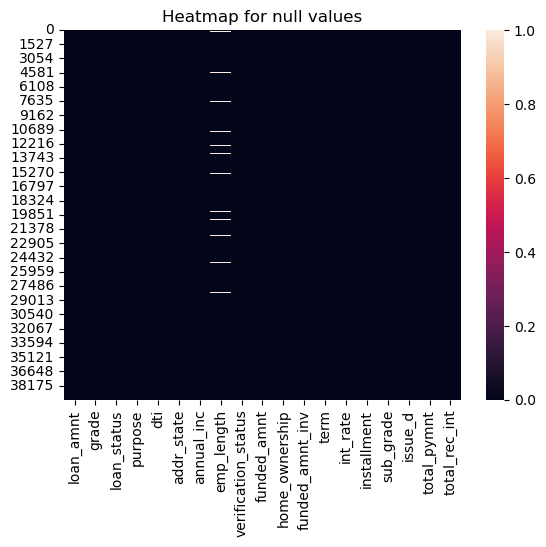

In [113]:
sns.heatmap(df2.isnull())
plt.title("Heatmap for null values")
plt.show()

# 2]Fixing missing values 

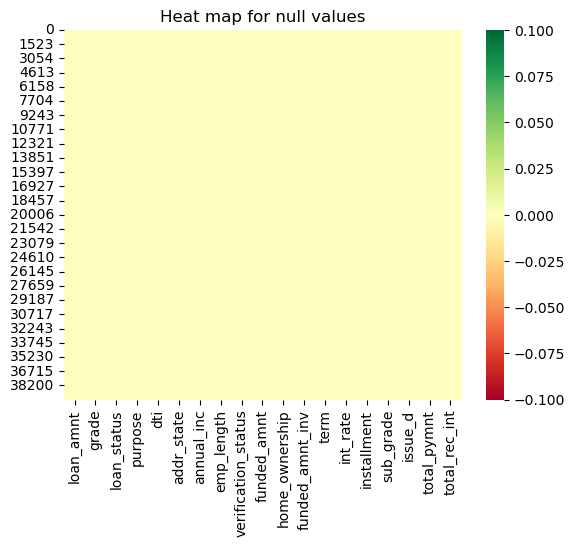

In [114]:
#removing missing values
df2=df2[~df2.emp_length.isnull()]
sns.heatmap(df2.isnull(),cmap='RdYlGn')
plt.title("Heat map for null values")
plt.show()

# 3] Fixing Datatypes

In [115]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38601 entries, 0 to 39684
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38601 non-null  int64  
 1   grade                38601 non-null  object 
 2   loan_status          38601 non-null  object 
 3   purpose              38601 non-null  object 
 4   dti                  38601 non-null  float64
 5   addr_state           38601 non-null  object 
 6   annual_inc           38601 non-null  float64
 7   emp_length           38601 non-null  object 
 8   verification_status  38601 non-null  object 
 9   funded_amnt          38601 non-null  int64  
 10  home_ownership       38601 non-null  object 
 11  funded_amnt_inv      38601 non-null  float64
 12  term                 38601 non-null  object 
 13  int_rate             38601 non-null  object 
 14  installment          38601 non-null  float64
 15  sub_grade            38601 non-null 

In [116]:
# int_rate
df2.int_rate=df2.int_rate.apply(lambda x: float(x.split("%")[0]))


# -----------------------------------------------------------------------------------------------------

# Univariate Analysis
#### a]Statistics on numeric features
#### b]cateegorical ordered univariate analysis
#### c]categorical unordered univarite analysis


## a] Statistics on numeric features 
### 1.Loan Amount analysis 

count    38601.000000
mean     11296.992954
std       7462.896448
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64


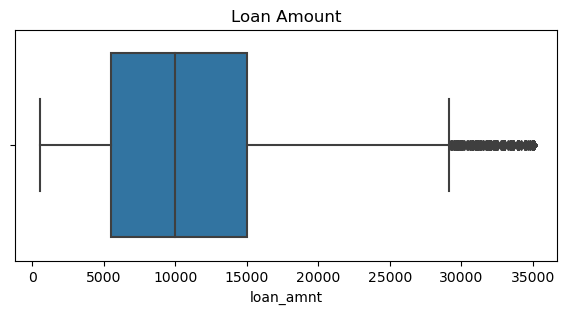

In [117]:
# LOAN AMOUNT ANALYSIS
plt.figure(figsize=(7,3))
print(df2.loan_amnt.describe())
sns.boxplot(df2.loan_amnt)
plt.title('Loan Amount')
plt.show()

##### The loan amount has valid values and no outliers.


#### The median of loan amount is 10k and most of the customer are likely to take loan amount in the range between 5k to 15k .

### 2.Annual Income below 1lakh

count     37907.000000
mean      64945.803261
std       32849.534829
min        4000.000000
25%       41000.000000
50%       59000.000000
75%       80400.000000
max      199992.000000
Name: annual_inc, dtype: float64


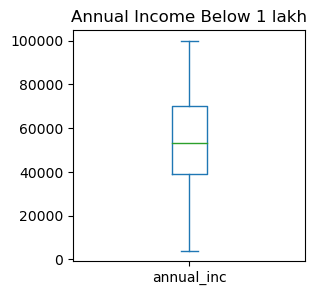

In [118]:
#here we filter the date or remove outliers such as customers income more then 1 lack .
plt.figure(figsize=(3,3))
print(df2[df2.annual_inc<200000].annual_inc.describe())
df2[df2.annual_inc<100000].annual_inc.plot.box()
plt.title("Annual Income Below 1 lakh")
plt.show()

#### The average income of the customers during registration is around 55k and most of the them fall in range 39k to 70k.

### 3.Interest Rate

count    38601.000000
mean        12.055223
std          3.717055
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64


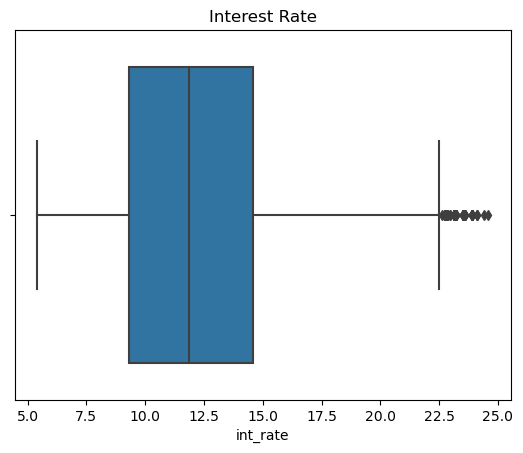

In [119]:
print(df2.int_rate.describe())
sns.boxplot(df2.int_rate)
plt.title('Interest Rate')
plt.show()

#### The average interest rate of the loan applicant is 12 percent.

# 4. Installment

count    37004.000000
mean       301.956964
std        173.448156
min         15.690000
25%        165.070000
50%        273.100000
75%        404.442500
max        799.840000
Name: installment, dtype: float64


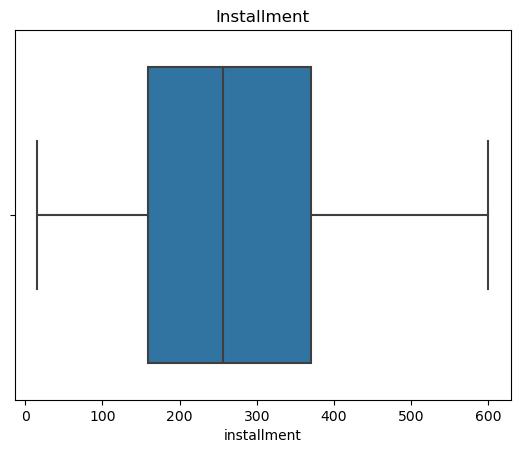

In [120]:
#installment
print(df2[df2.installment<800].installment.describe())
sns.boxplot(df2[df2.installment<600].installment)
plt.title('Installment')
plt.show()

#### We have many customers opting for installments between 165 to 404 rs per month



## b] Categorical Ordered Univariate Analysis 

### 1.Debt to Income Ratio - univariate

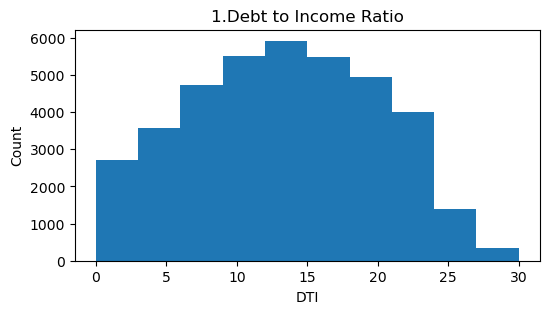

In [123]:
#DTI
plt.figure(figsize=(6,3))
plt.hist(df2.dti)
plt.title('1.Debt to Income Ratio')
plt.ylabel('Count')
plt.xlabel('DTI')
plt.show()

#### Most of the Customers who are availing loan have debt to income ratio in the range of 5 percent to 25 percent

### 2.The month-year which the loan was funded.

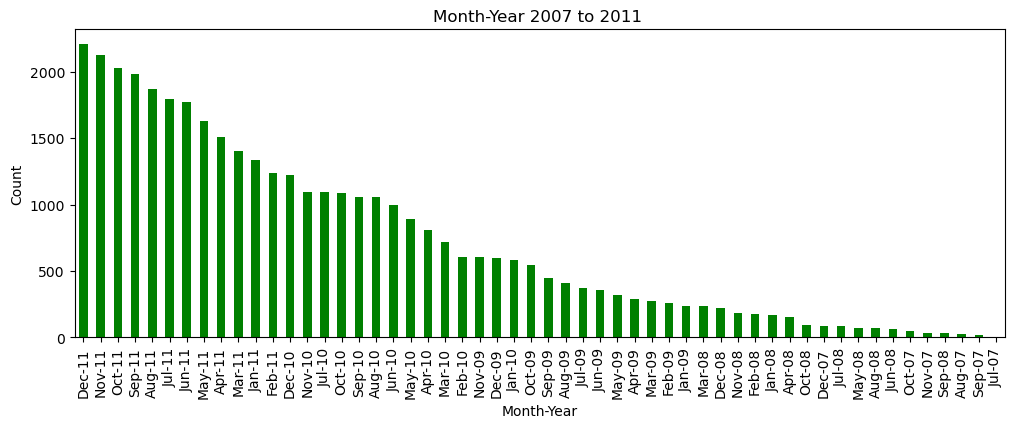

In [130]:
plt.figure(figsize=(12,4))
df2.issue_d.value_counts().plot.bar(color='green')
plt.title('Month-Year 2007 to 2011 ')
plt.ylabel('Count')
plt.xlabel('Month-Year')
plt.show()

#### We can see a strong increase in borrower  from less then 500 borrowings per month in 2007 to more then 2000 borrowings per month
#### Almost the Loan Funding increased by whopping four time in four years

### 3. Installment_bracket

In [131]:
def installment_bracket(x):
    if x <=200:
        return "Low"
    elif x>200 and x<=400:
        return "Medium"
    elif x>400 and x<=600:
        return "High"
    else :return "Very High"

df2['installment_bracke']=df2.installment.apply(lambda x : installment_bracket(x))

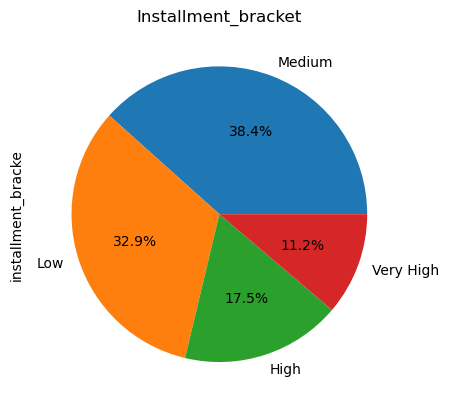

In [132]:
df2.installment_bracke.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Installment_bracket')
plt.show()

## c] Categorical Unordered Univariate Analysis

### 1.Default Rate -univariate

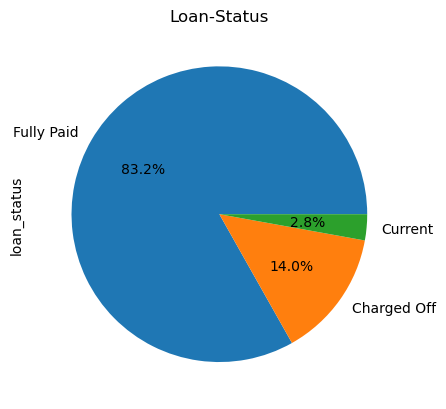

In [134]:
df2.loan_status.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Loan-Status')
plt.show()

#### This dataset contains a total of 14 percentage of default category or charged off category and 
#### 83 percentage of customers have setteled the loan amount and 3 percent are in the process.


# ----------------------------------------------------------------------------------------------------------

# Bivariate Analysis
#### a]Analysis Between Two Numeric Variables
#### b]Analysis Between Numeric and Categorical Variables
#### c]Analysis Between Two Categorical Variables



## a]Analysis Between  Numeric Variables

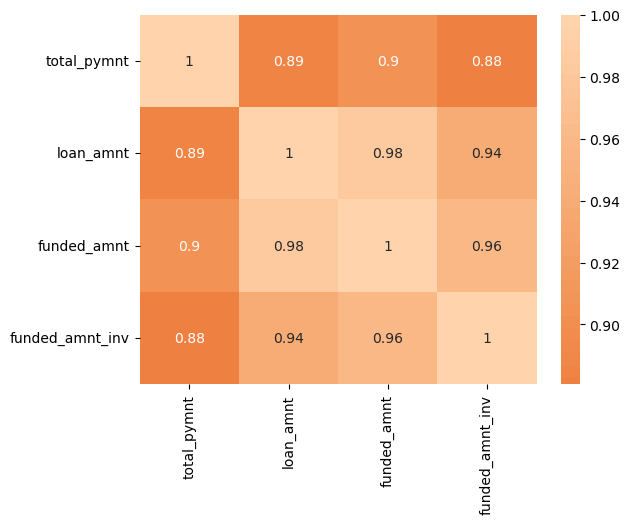

In [135]:
correlation_matirx=df2[['total_pymnt','loan_amnt','funded_amnt','funded_amnt_inv']].corr()
sns.heatmap(correlation_matirx,center=0.5,annot=True)
plt.show()

## b]Analysis between numeric and categorical variables

### 1.Grade vs interest rate

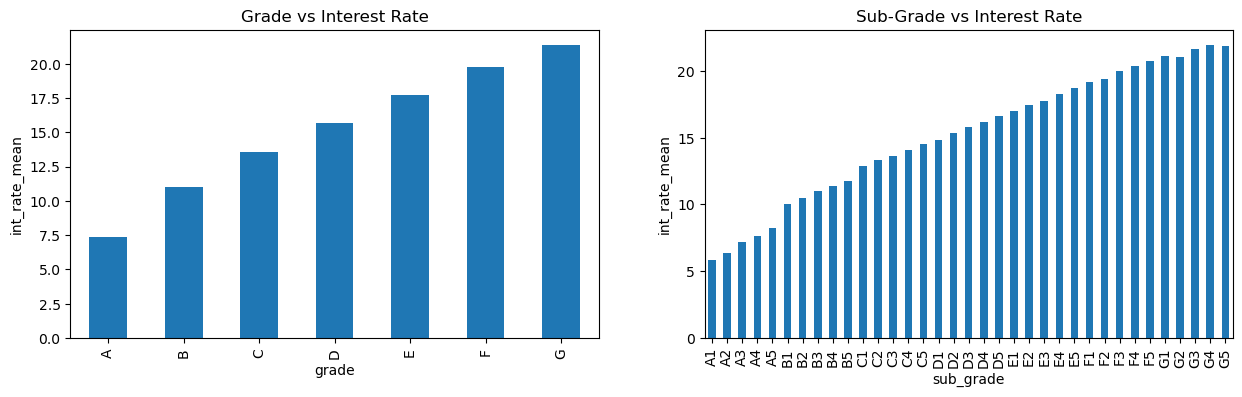

In [137]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
df2.groupby('grade').int_rate.mean().plot(kind='bar')
plt.title('Grade vs Interest Rate')
plt.ylabel('int_rate_mean')
plt.subplot(1,2,2)
df2.groupby('sub_grade').int_rate.mean().plot(kind='bar')
plt.title('Sub-Grade vs Interest Rate')
plt.ylabel('int_rate_mean')
plt.show()

#### Better is the grade lower are the average interest rates.

### 2.Grade vs installment

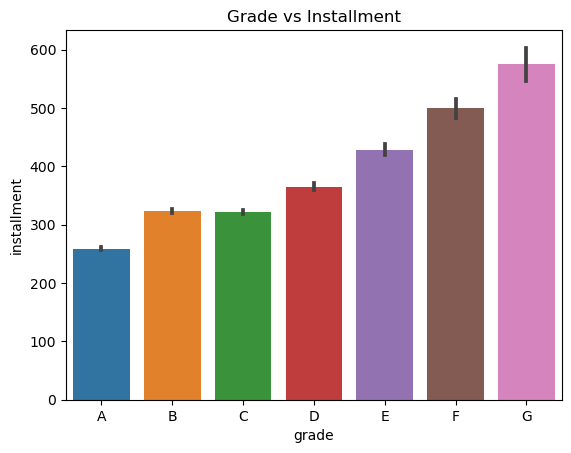

In [138]:
sns.barplot(x=df2.grade,y=df2.installment,order=['A','B','C','D','E','F','G'])
plt.title('Grade vs Installment')
plt.show()

#### good grade customers opt for smaller installments

### 3.Grade vs dti

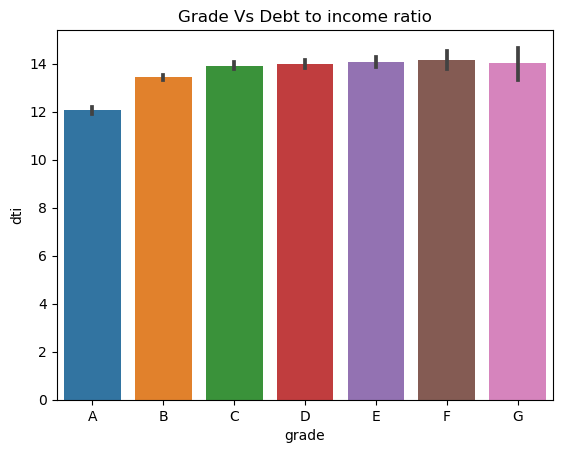

In [67]:
sns.barplot(x=df2.grade,y=df2.dti,order=['A','B','C','D','E','F','G'])
plt.title("Grade Vs Debt to income ratio")
plt.show()

####  The debt-to-income ratio (DTI) remains relatively stable across all grades, showing minimal significant changes

### 4.Interest Rate vs Purpose

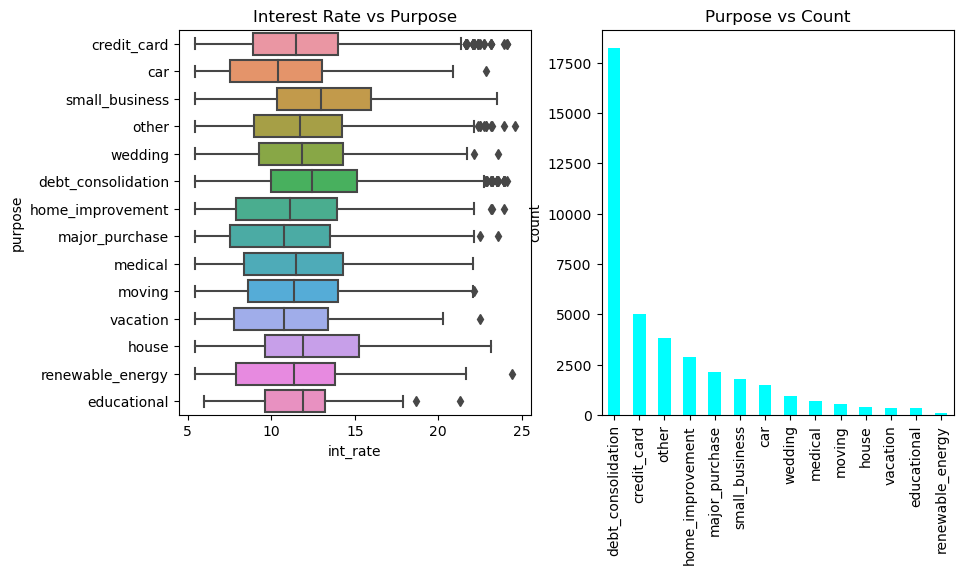

In [143]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Interest Rate vs Purpose')
sns.boxplot(x=df2.int_rate,y=df2.purpose)
plt.subplot(1,2,2)
plt.title('Purpose vs Count')
df2.purpose.value_counts().plot(kind='bar',color='cyan')
plt.ylabel('count')
plt.show()

#### The lowest intrest rate is for car and highest is for small business. Since debt consolidation has large customer segment the bank can increase the rate of interest to grab good profits.

## c]Analysis between two categorical variables

In [144]:
#creating default category and seperating month from month-year
df2["default"]=df2.loan_status.apply(lambda x : 0 if x=='Fully Paid' else 1)


### 1.Emp_length vs default

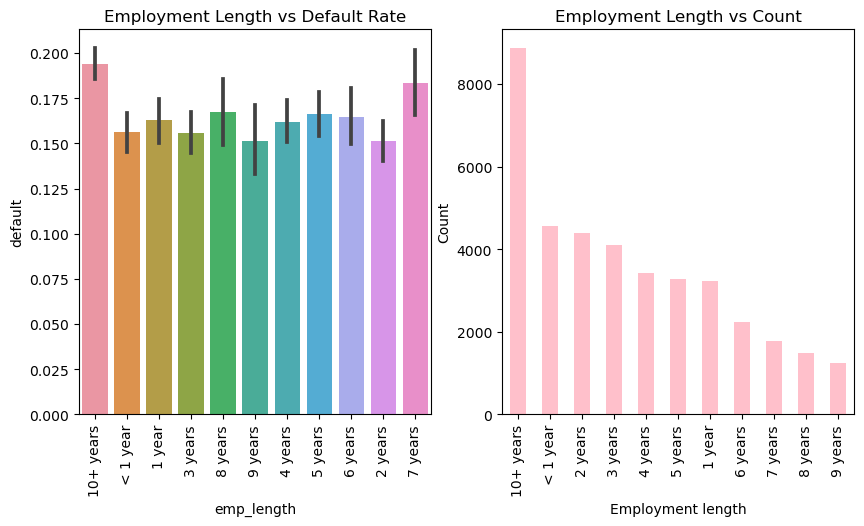

In [150]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Employment Length vs Default Rate')
sns.barplot(x=df2.emp_length,y=df2.default)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
plt.title('Employment Length vs Count')
df2.emp_length.value_counts().plot(kind='bar',color='pink')
plt.ylabel('Count')
plt.xlabel('Employment length')
plt.xticks(rotation=90)
plt.show()

#### Employee who having 10+ years experience are likely to take more loans, and exhibiting slightly higher chance of  loan charge-offs.

### 2.Purpose and  Default

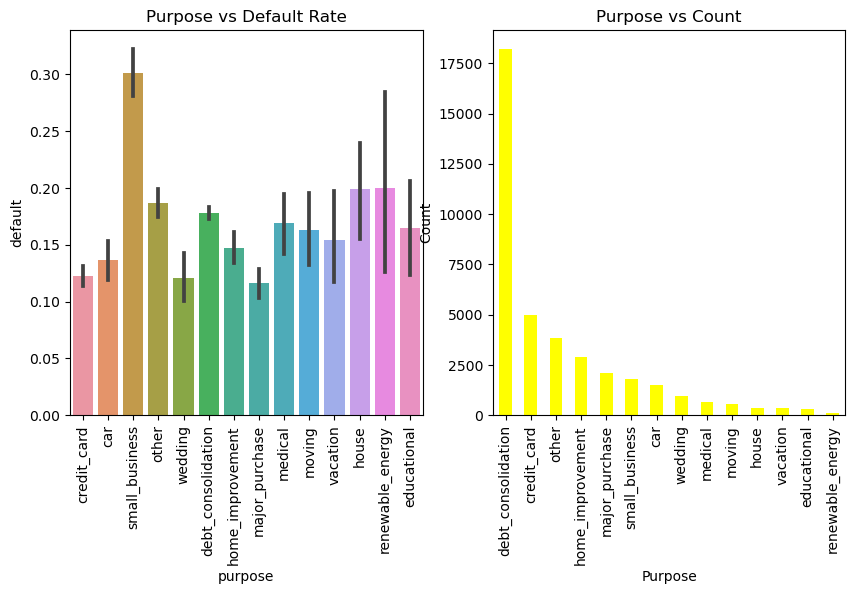

In [153]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title('Purpose vs Default Rate')
sns.barplot(x=df2.purpose,y=df2.default)
plt.xticks(rotation=90)
plt.subplot(1,2,2)
df2.purpose.value_counts().plot(kind='bar',color='yellow')
plt.title('Purpose vs Count')
plt.xlabel('Purpose')
plt.ylabel('Count')
plt.show()

#### Small_business loan are very likely to fall into default followed by house loans.
#### While, it is comparatively safer to give loans for car, wedding  category etc.
 

### 3.Purpose vs term

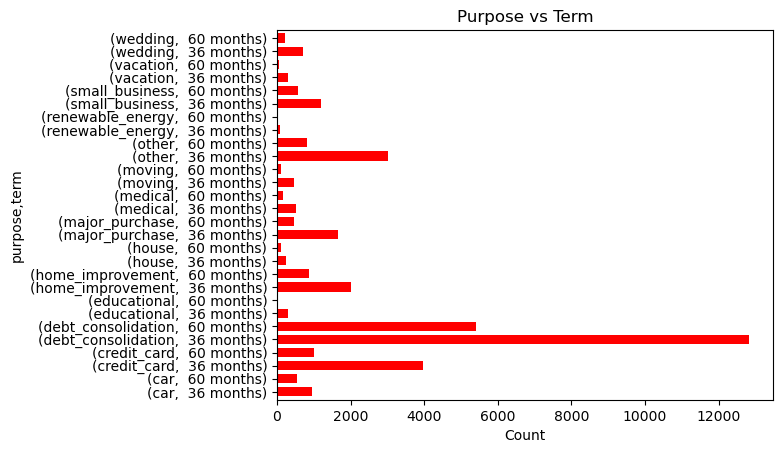

In [154]:
df2.groupby('purpose').term.value_counts().plot(kind='barh',color='r',width=0.7)
plt.xlabel('Count')
plt.title('Purpose vs Term')
plt.show()

#### Here the trend is all category loan are settled most in 36 month bracket than in 60 month bracket

### 4.Annual income bracket vs  default

In [156]:
def annual_inc_bracket(x):
    if x<=40000:
        return "Low"
    elif x>40000 and x<=60000:
        return "Medium"
    elif x>60000 and x<=80000:
        return "High"
    else: return "Very High"
df2["annual_inc_bracket"]=df2.annual_inc.apply(lambda x : annual_inc_bracket(x))


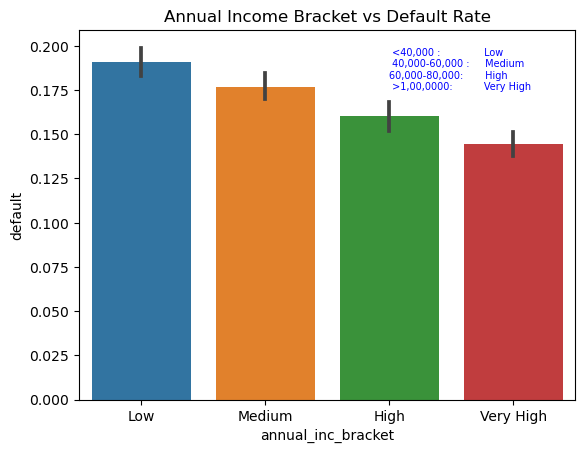

In [157]:
order1=["Low","Medium",'High','Very High']
sns.barplot(x=df2.annual_inc_bracket, y=df2.default, order=order1)
plt.text(x=2,y=0.175, s=" <40,000 :              Low\n 40,000-60,000 :     Medium\n60,000-80,000:       High\n >1,00,0000:          Very High ", fontsize=7, color='blue')
plt.title('Annual Income Bracket vs Default Rate')
plt.show()


#### The default rate tends to increase with lower income levels.

In [158]:
df2["issue_d_month"]=df2.issue_d.apply(lambda x : x.split('-')[0])

### 5.Issued_month vs default 

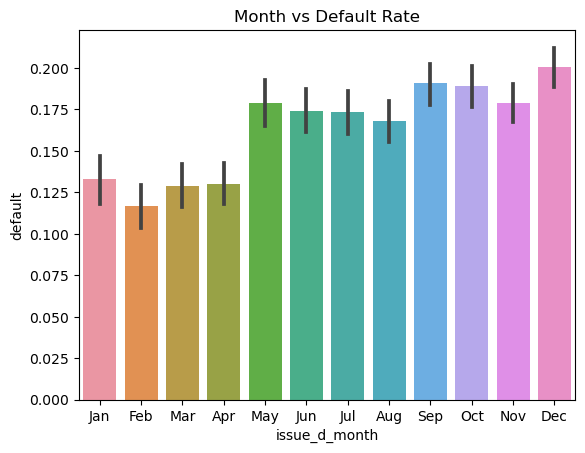

In [159]:
order1=["Jan","Feb","Mar","Apr",'May','Jun','Jul',"Aug","Sep","Oct","Nov",'Dec']
sns.barplot(x=df2.issue_d_month, y=df2.default, order=order1)
plt.title('Month vs Default Rate')
plt.show()

#### A noteworthy pattern indicates that significant defaults happen in second half of year

### 6.state_address vs default

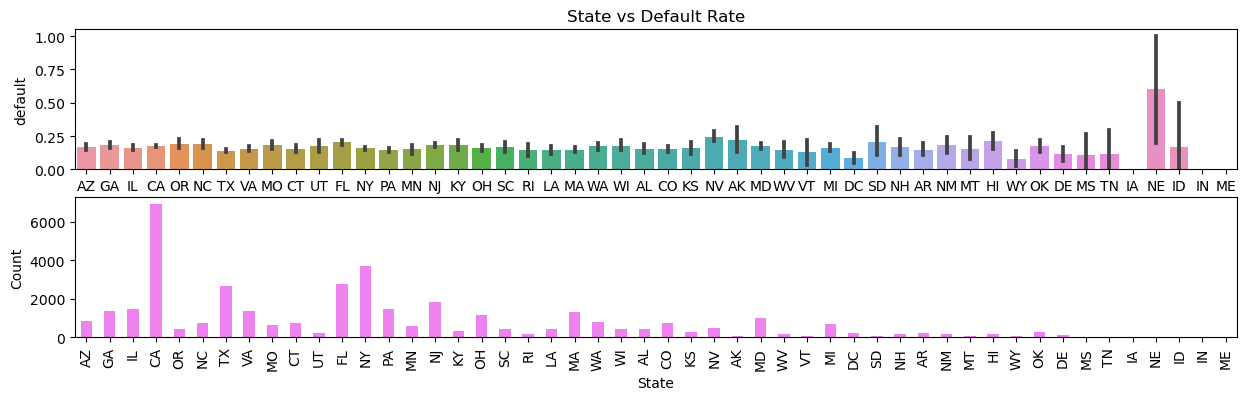

In [167]:
order1=['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME']
plt.figure(figsize=(15,4))
plt.subplot(2,1,1)
plt.title('State vs Default Rate')
sns.barplot(x=df2.addr_state,y=df2.default,order=order1)
plt.subplot(2,1,2)
df2.addr_state.value_counts().loc[order1].plot(kind='bar',color='violet')
plt.ylabel('Count')
plt.xlabel('State')
plt.show()

#### There is exceptional high chance of customer from NE (Nebraska)  state falling into default.
#### The State CA ( California) has lowest default rates, despite large number of borrowings followed by NY,FL and TX.


### 7.Grade and sub_grade vs default

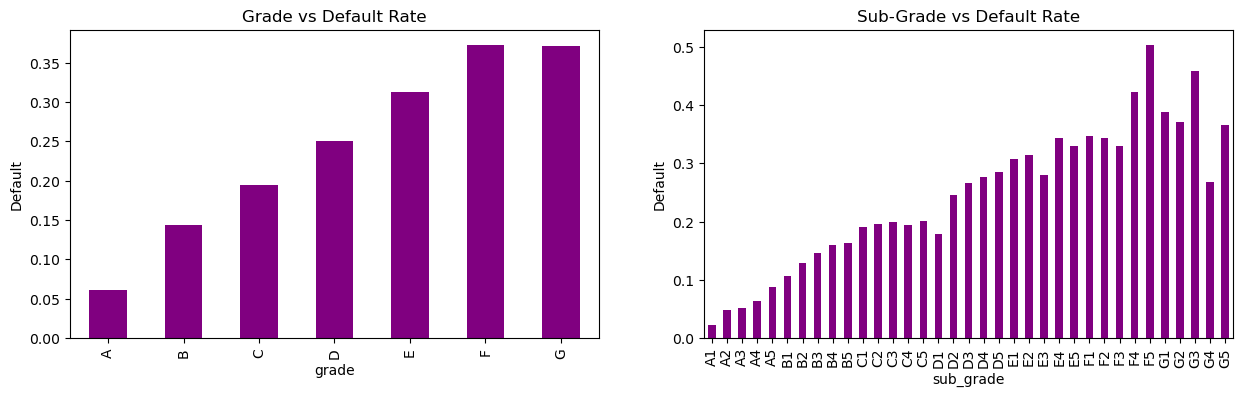

In [172]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("Grade vs Default Rate")
df2.groupby('grade').default.mean().plot(kind='bar',color='purple')
plt.ylabel('Default')
plt.subplot(1,2,2)
plt.title('Sub-Grade vs Default Rate')
plt.ylabel('Default')
df2.groupby('sub_grade').default.mean().plot(kind='bar',color='purple')


plt.show()

#### Most default are happening in grade F and G hence bank must give small loan to avoid losses

## 8. Verification_status vs default

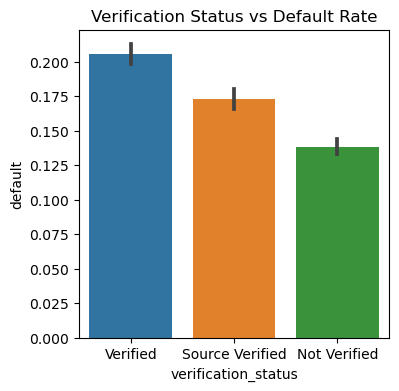

In [173]:
plt.figure(figsize=(4,4))
sns.barplot(x=df2.verification_status,y=df2.default)
plt.title('Verification Status vs Default Rate')
plt.show()

####  Verified source customers have higher chance of falling into default

## 9.Year vs default 

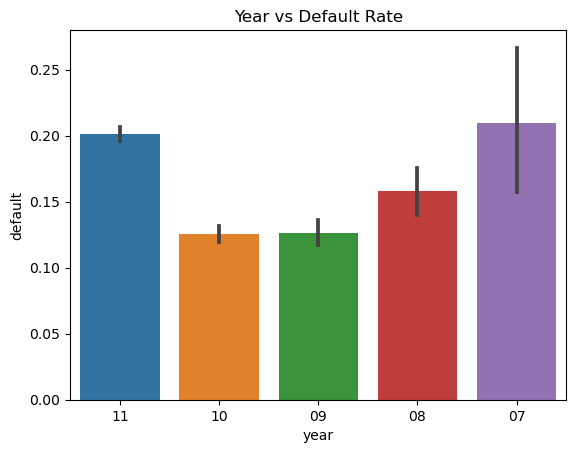

In [174]:
df2['year']=df2.issue_d.apply(lambda x : x.split('-')[1])
sns.barplot(x=df2.year,y=df2.default,order=['11','10','09','08','07'])
plt.title('Year vs Default Rate')
plt.show()

#### The default rate has suddenly increased despite decrease from the year 2008 to 2010

In [175]:
df2.loan_amnt.describe()

count    38601.000000
mean     11296.992954
std       7462.896448
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

## 10.Loan_amount_bracket vs default

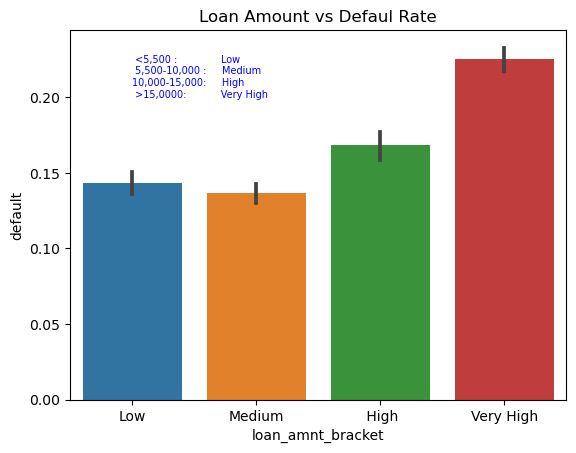

In [176]:

def loan(x):
    if x<=5500:
        return "Low"
    elif x>5500 and x<=10000:
        return "Medium"
    elif x>10000 and x<15000:
        return " High"
    else :return "Very High"
df2['loan_amnt_bracket']=df2.loan_amnt.apply(lambda x : loan(x))
sns.barplot(x=df2.loan_amnt_bracket,y=df2.default)
plt.text(x=0,y=0.20, s=" <5,500 :              Low\n 5,500-10,000 :     Medium\n10,000-15,000:     High\n >15,0000:           Very High ", fontsize=7, color='blue')
plt.title('Loan Amount vs Defaul Rate')
plt.show()

#### The is an elevated likelihood of default associated with higher loan amounts .


## 11.Interest rate bracket vs default

In [177]:
df2.int_rate.describe()

count    38601.000000
mean        12.055223
std          3.717055
min          5.420000
25%          9.320000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

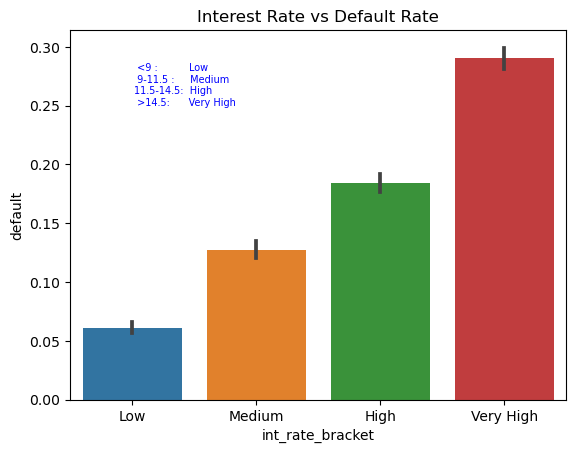

In [178]:
def irate(x):
    x=str(x)
    x=float(x.split("%")[0])
    if x<=9:
        return "Low"
    elif x>9 and x<=11.5:
        return "Medium"
    elif x>11.5 and x<=14.5:
        return "High"
    else: return "Very High"
    
df2['int_rate_bracket']=df2.int_rate.apply(lambda x: irate(x))
sns.barplot(x=df2.int_rate_bracket,y=df2.default,order=["Low",'Medium','High','Very High'])
plt.text(x=0.01,y=0.25, s=" <9 :          Low\n 9-11.5 :     Medium\n11.5-14.5:  High\n >14.5:      Very High ", fontsize=7, color='blue')
plt.title('Interest Rate vs Default Rate')
plt.show()

#### Higher is the interest rate , higher is the default 

### 12. Debt to income bracket vs default

In [179]:
df2.dti.describe()

count    38601.000000
mean        13.330845
std          6.665128
min          0.000000
25%          8.210000
50%         13.420000
75%         18.600000
max         29.990000
Name: dti, dtype: float64

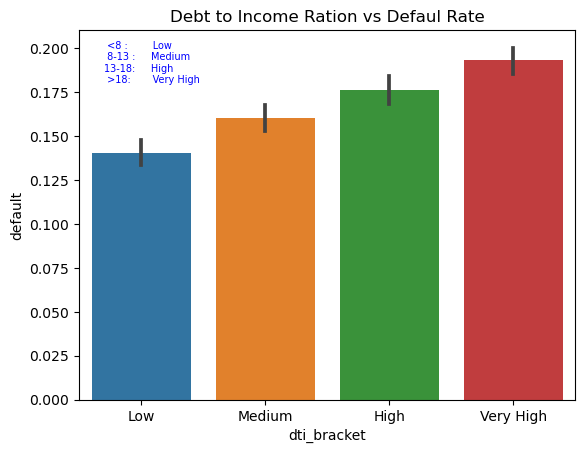

In [180]:
def dti(x):

    if x<=8:
        return "Low"
    elif x>8 and x<=13:
        return "Medium"
    elif x>13 and x<=18:
        return "High"
    else: return "Very High"
    
df2['dti_bracket']=df2.dti.apply(lambda x: dti(x))
sns.barplot(x=df2.dti_bracket,y=df2.default,order=["Low",'Medium','High','Very High'])
plt.text(x=-0.3,y=0.18, s=" <8 :        Low\n 8-13 :     Medium\n13-18:     High\n >18:       Very High ", fontsize=7, color='blue')
plt.title('Debt to Income Ration vs Defaul Rate')
plt.show()

#### Highter is the dti ratio , more is the possibility of default
# --------------------------------------------------------------------------------------------------------

# Multi varitate Ananlysis

## 1. loan_amount vs dti_bracket vs default

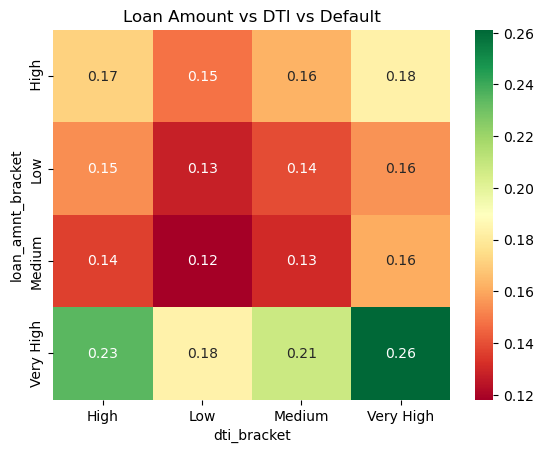

In [181]:
res=pd.pivot_table(data=df2,index='loan_amnt_bracket',columns='dti_bracket',values='default')
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.title('Loan Amount vs DTI vs Default')
plt.show()

#### The combination of very high loan amount and high dti_bracket increases the likelyhood of default

## 2. loan_amount vs int_rate_bracket vs default

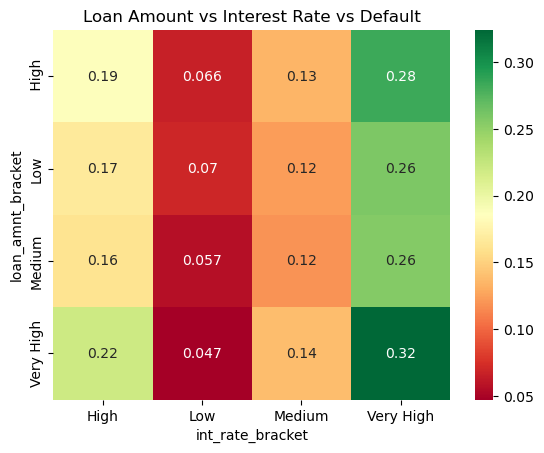

In [182]:
res=pd.pivot_table(data=df2,index='loan_amnt_bracket',columns='int_rate_bracket',values='default')
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.title('Loan Amount vs Interest Rate vs Default')
plt.show()

#### Regardless of the loan amount, if there is very high debt-to-income (DTI) ratio, the likelihood of default increases.

## 3. loan_amnt_bracket vs grade vs default 

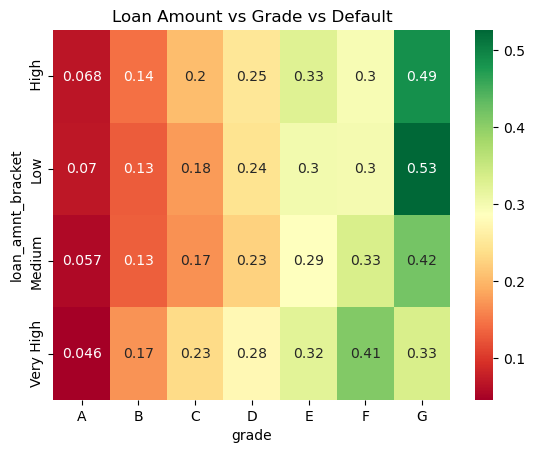

In [183]:
res=pd.pivot_table(data=df2,index='loan_amnt_bracket',columns='grade',values='default')
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.title('Loan Amount vs Grade vs Default')
plt.show()

#### Within the F grade, default risk is associated with Very high loan amounts, whereas in grade G, default tendencies are influenced by all loan category holders. 

## 4. Installment_Bracket vs dti_bracket vs default

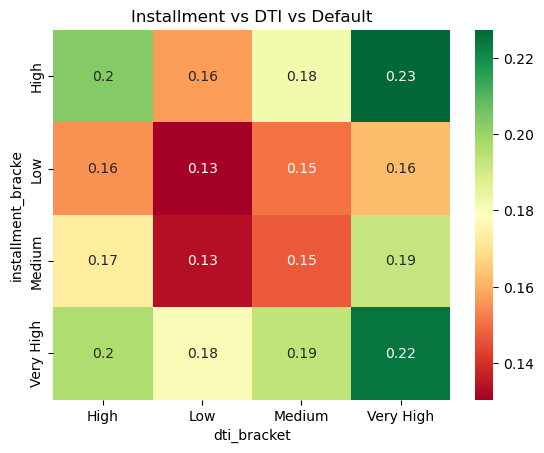

In [184]:
res=pd.pivot_table(data=df2,index='installment_bracke',columns='dti_bracket',values='default')
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.title('Installment vs DTI vs Default')
plt.show()

#### High installment brackets and elevated debt-to-income (DTI) brackets significantly increase the likelihood of default.

## 5.Purpose vs int_rate_bracket vs default

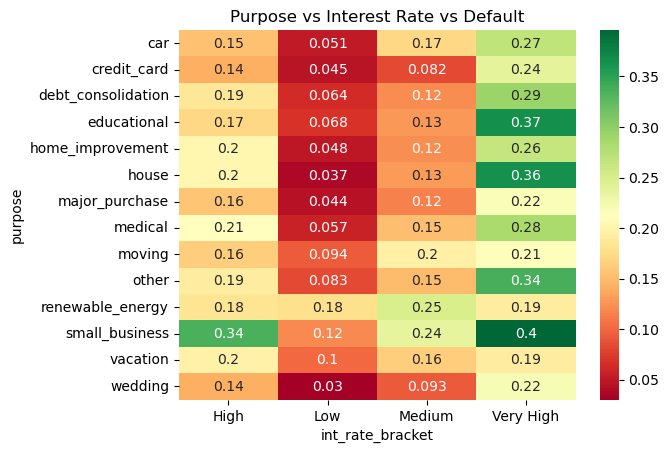

In [186]:
res=pd.pivot_table(data=df2,index='purpose',columns='int_rate_bracket',values='default')
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.title('Purpose vs Interest Rate vs Default')
plt.show()

#### High interest rates on small business, education, and home loans contribute to a higher incidence of defaults.

## 6. Intrest Rate vs DTI vs Default

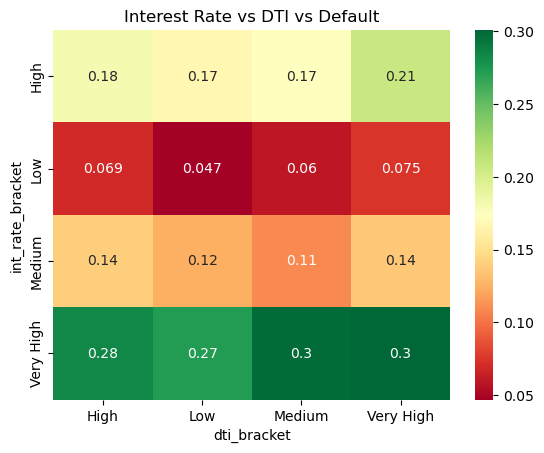

In [187]:
res=pd.pivot_table(data=df2,index='int_rate_bracket',columns='dti_bracket',values='default')
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.title('Interest Rate vs DTI vs Default')
plt.show()

#### Regardless of the debt-to-income (DTI) ratio, a high interest rate increases the likelihood of default.

# 7 Loan amount vs Annual Income vs Default

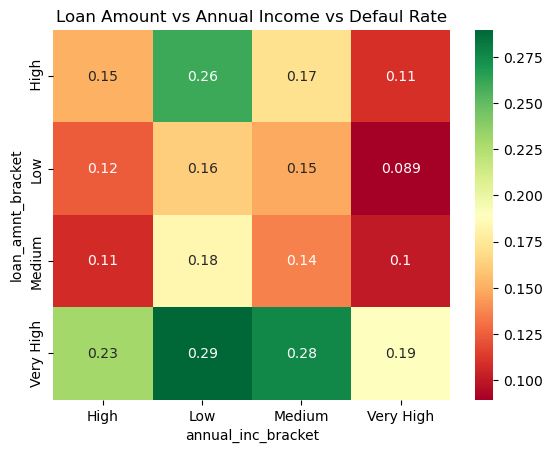

In [189]:
res=pd.pivot_table(data=df2,index='loan_amnt_bracket',columns='annual_inc_bracket',values='default')
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.title("Loan Amount vs Annual Income vs Defaul Rate")
plt.show()

#### There highly likelihood that low and medium income holders fall into default after taking very high loans.